# Backtesting a multifactor strategy based on momentum and low volatility of IBrX100 stocks 


**What ?**

The **momentum** and **low volatility** strategies are two of the most common techniques in behavioral finance. The momentum hypothesis is based on the trend of market prices to follow their previous sequences of results, whether they are high or low. In addition, the low volatility anomaly is considered counterintuitive because traditional financial theory suggests that higher risk should be rewarded with higher returns. However, low volatility stocks often perform better on a risk-adjusted basis, which can be attributed to investor behavior, such as overpaying for high-risk stocks in the pursuit of higher returns.
    By adhering to both of these market behavioral hypotheses, we can develop an **automated portfolio strategy** where the algorithm will monthly buy only the tickers that had the highest returns and low volatility, following a specific rule. This approach is expected to yield a multiyear return adjusted by risk that is better than the market benchmark.

**Why ?** 

Backtesting a strategy is a useful tool for evaluating its performance in the real market. The momentum and low volatility strategy is widely discussed in academic papers and utilized by asset managers. Here, we will examine how this strategy performs using historical **brazilians tickers** prices.


**How ?**

Starting with the 100 tickers listed in the IBRX100 Brazilian index as of July 2024, we will download their prices from the Yahoo Finance library for the period from 2017 to June 2024. For each ticker, the twelve-month returns will be calculated daily. The top 25 tickers with the highest monthly returns will be selected. Among these 25 tickers, we will calculate the EWMA standard deviation over a 252-day window and select the top 10 tickers with the lowest volatility. These final 10 tickers will form our portfolio for the following month, each ticker with equal weight. Each month, the portfolio will be updated with the same rule, maintaining the essence of the momentum/low-vol strategy by always including the best-performing assets, which are expected to continue their good results. Finally, the overall portfolio return and volatility will be calculated, and the results analyzed against the Ibovespa performance.


<img src="https://lh3.googleusercontent.com/d/1lnWVqgtuy-y3Tnq25TdN00JEnHe6U7_M" alt="diagram_momentum_low_vol_strategy" width="500" align="center">


**Results obtained:** 

The results obtained confirm that the momentum combined with low-vol strategy can indeed bring positive returns to investors, with an overall return of **349%** in the period against **159%** of Ibovespa for a anualized volatility of **23.2%** against **25%** from Ibovespa, excluding transaction costs and fees.



<span style="font-size:0.8em;">*Credits: This code is based on class material by Ph.D. Gerson Júnior, part of his course "Programming for Asset Management" available here [link](https://tradingcomdados.ac-page.com/programacao-asset-management)*</span>




<a id="0"></a>
## Table of Contents

1. [Import Libraries](#1)
2. [Import IBRX100 tickers prices from Yahoo finance](#2)
3. [Calculate 12 months returns and EWMA volatillity](#3)
4. [Selecting top 10 tickers with bigger returns and low volatility](#4)
5. [Backtesting portifolio returns](#5)
6. [Comparing portifolio performance against benchmark](#6)
7. [Results and future improvements](#7)

<a id="1"></a>
## Import Libraries


In [350]:
import pandas as pd
import numpy as np
import os

import yfinance as yf

<a id="2"></a>
## Import IBRX100 tickers prices from Yahoo finance
[←](#0)

In [69]:
script_directory = os.getcwd() #getting the script directory path
directory_path = os.path.join(script_directory,'IBRX100_20240603.csv') # IBRX100 index composition downloaded from B3 website

# import IBRX100 tickers compositions
df_ibrx100 = pd.read_csv(directory_path, sep = ';', encoding = 'Latin-1')
df_ibrx100['tickers'] = df_ibrx100['Código'] + '.SA'
df_ibrx100 = df_ibrx100[['tickers']]

# show all tickers from IBRX100
ticker_df = pd.DataFrame(df_ibrx100['tickers'].sort_values().values.reshape(10, 10))
#pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 
print(ticker_df)

           0          1         2          3         4          5          6         7          8         9
0   ABEV3.SA   ALOS3.SA  ALPA4.SA   ARZZ3.SA  ASAI3.SA   AURE3.SA   AZUL4.SA  B3SA3.SA   BBAS3.SA  BBDC3.SA
1   BBDC4.SA   BBSE3.SA  BEEF3.SA  BPAC11.SA  BRAP4.SA   BRFS3.SA   BRKM5.SA  CCRO3.SA   CIEL3.SA  CMIG4.SA
2   CMIN3.SA   COGN3.SA  CPFE3.SA   CPLE3.SA  CPLE6.SA   CRFB3.SA   CSAN3.SA  CSMG3.SA   CSNA3.SA  CVCB3.SA
3   CXSE3.SA   CYRE3.SA  DIRR3.SA   DXCO3.SA  ECOR3.SA   EGIE3.SA   ELET3.SA  ELET6.SA   EMBR3.SA  ENAT3.SA
4   ENEV3.SA  ENGI11.SA  EQTL3.SA   EZTC3.SA  FLRY3.SA   GGBR4.SA   GMAT3.SA  GOAU4.SA   HAPV3.SA  HYPE3.SA
5  IGTI11.SA   IRBR3.SA  ITSA4.SA   ITUB4.SA  JBSS3.SA  KLBN11.SA   LREN3.SA  LWSA3.SA   MGLU3.SA  MOVI3.SA
6   MRFG3.SA   MRVE3.SA  MULT3.SA   NTCO3.SA  PCAR3.SA   PETR3.SA   PETR4.SA  PETZ3.SA   POMO4.SA  PRIO3.SA
7   PSSA3.SA   RADL3.SA  RAIL3.SA   RAIZ4.SA  RDOR3.SA   RECV3.SA   RENT3.SA  RRRP3.SA  SANB11.SA  SBSP3.SA
8   SLCE3.SA   SMFT3.SA  SMT

#### Importing prices from yahoo finance
[←](#0)

In [70]:
start_date = '2017-01-01' # initial date
end_date = '2024-06-30' # final date
data = yf.download(df_ibrx100['tickers'].to_list(), start = start_date, end = end_date)['Adj Close']
data['time'] = data.index

# change dataframe wide to long
data = pd.melt(data, id_vars = ['time'], var_name = 'asset', value_name = 'price') 

data.head()

[*********************100%%**********************]  100 of 100 completed


,time,asset,price
0,2017-01-02,ABEV3.SA,12.610020
1,2017-01-03,ABEV3.SA,12.865161
2,2017-01-04,ABEV3.SA,12.764649
3,2017-01-05,ABEV3.SA,12.834233
4,2017-01-06,ABEV3.SA,12.725992


<a id="3"></a>
## Calculate 12 months returns and EWMA volatillity
[←](#0)

In [71]:
# grouping ticker and calculate return 12m and lagged price

#lagged price
data['lagged_price'] = data.groupby('asset')['price'].shift() 
#returns
data['returnDaily'] = data.groupby('asset')['price'].pct_change() # daily returns of price for EWMA volatility
data['return12m'] = data.groupby('asset')['price'].transform(lambda x: x / x.shift(252) - 1) #returns 12 month
#volatility 252 window
data['vol_ewma'] = data.groupby('asset')['returnDaily'].ewm(span = 252 ,min_periods = 252, adjust=False).std().reset_index(level = 0).rename(columns = {'returnDaily':'vol_ewma'})['vol_ewma'] 

data.head()

,time,asset,price,lagged_price,returnDaily,return12m,vol_ewma
0,2017-01-02,ABEV3.SA,12.610020,NaN,NaN,NaN,NaN
1,2017-01-03,ABEV3.SA,12.865161,12.610020,0.020233,NaN,NaN
2,2017-01-04,ABEV3.SA,12.764649,12.865161,-0.007813,NaN,NaN
3,2017-01-05,ABEV3.SA,12.834233,12.764649,0.005451,NaN,NaN
4,2017-01-06,ABEV3.SA,12.725992,12.834233,-0.008434,NaN,NaN


###### Getting last days rows over month

In [72]:
# transform to date time format
data['time'] = pd.to_datetime(data['time'])

#groupping by asset ticker and month
groups = data.groupby(['asset', data['time'].dt.to_period('M')])

# using the idxmax() function to get the maximum index (last day) of each group ticker-month group
idx = groups['time'].idxmax()

# filtering data prices only at the last day of each ticker-month group
data_montly = data.loc[idx]

data_montly.head()

,time,asset,price,lagged_price,returnDaily,return12m,vol_ewma
20,2017-01-31,ABEV3.SA,13.352022,13.173478,0.013553,NaN,NaN
38,2017-02-24,ABEV3.SA,13.848842,14.073959,-0.015995,NaN,NaN
61,2017-03-31,ABEV3.SA,14.159352,14.182643,-0.001642,NaN,NaN
79,2017-04-28,ABEV3.SA,14.174878,14.128303,0.003297,NaN,NaN
101,2017-05-31,ABEV3.SA,14.524204,14.586309,-0.004258,NaN,NaN


<a id="4"></a>
## Selecting top 10 tickers with bigger returns and low volatility
[←](#0)

In [73]:
# Creating Year-Month column
data_montly['Yearmon'] = data_montly['time'].dt.to_period('M')

# Rank over each month what was the ticker which had the biggest 12 month return
data_montly['rank_return'] = data_montly.groupby('Yearmon')['return12m'].rank(ascending = False)
# selecting the top 25 bigger returns
top_25_returns = data_montly[data_montly['rank_return'].between(1,25)].reset_index(drop = True)


# Rank over each month what was the ticker which had the lowest 12 month EWMA volatility
top_25_returns['rank_vol'] = top_25_returns.groupby('Yearmon')['vol_ewma'].rank(ascending = True)
# selecting the top 10 lower volatility tickers among the top 25 bigger returns
top_10_returns_vol = top_25_returns[top_25_returns['rank_vol'].between(1,10)].reset_index(drop = True)


top_10_returns_vol.head()

,time,asset,price,lagged_price,returnDaily,return12m,vol_ewma,Yearmon,rank_return,rank_vol
0,2021-10-29,ABEV3.SA,14.761795,14.509830,0.017365,0.310572,0.021661,2021-10,18.0,4.0
1,2017-12-29,ALPA4.SA,13.347281,13.347281,0.000000,0.806557,0.017953,2017-12,14.0,5.0
2,2018-01-31,ALPA4.SA,12.222897,12.352928,-0.010526,0.588582,0.017793,2018-01,18.0,5.0
3,2018-02-28,ALPA4.SA,13.280314,13.311324,-0.002330,0.494138,0.017404,2018-02,15.0,4.0
4,2018-03-29,ALPA4.SA,13.479485,12.856155,0.048485,0.458104,0.017826,2018-03,23.0,4.0


In [74]:
#the portifolios is rebalanced every 1st day from each month

top_10_returns_vol['time1'] = pd.to_datetime(top_10_returns_vol['time']) + pd.DateOffset(months = 1) 
top_10_returns_vol['Yearmon_c'] = top_10_returns_vol['time1'].dt.to_period('M') # corrected year month date to consider the montly rebalance

df1 = top_10_returns_vol #saving for excel analysis
top_10_returns_vol.head()

,time,asset,price,lagged_price,returnDaily,return12m,vol_ewma,Yearmon,rank_return,rank_vol,time1,Yearmon_c
0,2021-10-29,ABEV3.SA,14.761795,14.509830,0.017365,0.310572,0.021661,2021-10,18.0,4.0,2021-11-29,2021-11
1,2017-12-29,ALPA4.SA,13.347281,13.347281,0.000000,0.806557,0.017953,2017-12,14.0,5.0,2018-01-29,2018-01
2,2018-01-31,ALPA4.SA,12.222897,12.352928,-0.010526,0.588582,0.017793,2018-01,18.0,5.0,2018-02-28,2018-02
3,2018-02-28,ALPA4.SA,13.280314,13.311324,-0.002330,0.494138,0.017404,2018-02,15.0,4.0,2018-03-28,2018-03
4,2018-03-29,ALPA4.SA,13.479485,12.856155,0.048485,0.458104,0.017826,2018-03,23.0,4.0,2018-04-29,2018-04


In [75]:
top_10_returns_vol = top_10_returns_vol[['Yearmon_c','rank_vol','asset']]
top_10_returns_vol.head()

,Yearmon_c,rank_vol,asset
0,2021-11,4.0,ABEV3.SA
1,2018-01,5.0,ALPA4.SA
2,2018-02,5.0,ALPA4.SA
3,2018-03,4.0,ALPA4.SA
4,2018-04,4.0,ALPA4.SA


In [76]:
# preparing daily price to build a join with top 10 data frame of selected assets
data['time'] = pd.to_datetime(data['time'])
data['Yearmon_c'] = data['time'].dt.to_period('M')

# inner join to select daily prices only for top 10 tickers performances over each month
data = pd.merge(data,top_10_returns_vol[['Yearmon_c','rank_vol','asset']], how = 'inner', on = ['Yearmon_c','asset'])
df2 = data #saving for excel analysis
data.head()

,time,asset,price,lagged_price,returnDaily,return12m,vol_ewma,Yearmon_c,rank_vol
0,2021-11-01,ABEV3.SA,15.083271,14.761795,0.021778,0.319376,0.021655,2021-11,4.0
1,2021-11-03,ABEV3.SA,15.491631,15.083271,0.027074,0.323878,0.021694,2021-11,4.0
2,2021-11-04,ABEV3.SA,15.535073,15.491631,0.002804,0.298608,0.021608,2021-11,4.0
3,2021-11-05,ABEV3.SA,15.552449,15.535073,0.001118,0.345543,0.021523,2021-11,4.0
4,2021-11-08,ABEV3.SA,15.413435,15.552449,-0.008938,0.368425,0.021456,2021-11,4.0


<a id="5"></a>
## Backtesting portifolio returns
[←](#0)

In [77]:
# calculating portifolio quota price per ticker

data['return_group'] = data.groupby('rank_vol') \
                       .apply(lambda group: (group['price'] / group['lagged_price']) - 1) \
                       .reset_index(level = 0, drop = True) 

data['quota'] = data.groupby(['rank_vol','Yearmon_c'])['return_group'].transform(lambda x: (1 + x ).cumprod()) # cumulative return over rank (ticker) and month
df3 = data #saving for excel analysis
data.head()

,time,asset,price,lagged_price,returnDaily,return12m,vol_ewma,Yearmon_c,rank_vol,return_group,quota
0,2021-11-01,ABEV3.SA,15.083271,14.761795,0.021778,0.319376,0.021655,2021-11,4.0,0.021778,1.021778
1,2021-11-03,ABEV3.SA,15.491631,15.083271,0.027074,0.323878,0.021694,2021-11,4.0,0.027074,1.049441
2,2021-11-04,ABEV3.SA,15.535073,15.491631,0.002804,0.298608,0.021608,2021-11,4.0,0.002804,1.052384
3,2021-11-05,ABEV3.SA,15.552449,15.535073,0.001118,0.345543,0.021523,2021-11,4.0,0.001118,1.053561
4,2021-11-08,ABEV3.SA,15.413435,15.552449,-0.008938,0.368425,0.021456,2021-11,4.0,-0.008938,1.044144


In [78]:
# calculating final portifolio quota for all ticker equally weighted
data = (
    data.groupby('time') # for each day, calculate the portifolio quota considering the 10 assets equally weighted
    .agg(quota_long = ('quota', lambda x: x.sum()/len(x)))
    .reset_index())
df4 = data  #saving for excel analysis
data.head()

,time,quota_long
0,2018-01-02,1.007147
1,2018-01-03,1.006088
2,2018-01-04,1.008192
3,2018-01-05,1.013290
4,2018-01-08,1.000495


In [83]:
# compound portifolio returns over time
data['Yearmon'] = data['time'].dt.to_period('M')
data['order'] = data.groupby('Yearmon')['time'].rank()

#  calculating the portfolio return over time considering the portifolios is rebalanced every month
data['return_long'] = data.apply(lambda row: row['quota_long'] - 1.0 if row['order'] == 1 else row['quota_long']/data.loc[row.name-1,'quota_long'] - 1, axis = 1)

# calculating the cumulative return over the entire period
data['quota_portifolio'] = (1+data['return_long']).cumprod()
df5 = data #saving for excel analysis

data.set_index(['time'], inplace = True)

data.tail()

,quota_long,Yearmon,order,return_long,quota_portifolio
time,,,,,
2024-06-24,1.021640,2024-06,16.0,0.013301,3.513594
2024-06-25,1.020405,2024-06,17.0,-0.001210,3.509344
2024-06-26,1.017169,2024-06,18.0,-0.003171,3.498217
2024-06-27,1.017563,2024-06,19.0,0.000387,3.499572
2024-06-28,1.013771,2024-06,20.0,-0.003726,3.486531


<a id="6"></a>
## Comparing portifolio performance against benchmark
[←](#0)

##### Download and calculation of Ibovespa returns

In [128]:
bench_list = ['^BVSP']
df_benchmk = yf.download(bench_list, start = '2018-01-02', end = end_date)['Adj Close'].to_frame().rename(columns = {'Adj Close':'ibov'})
df_benchmk.head()

[*********************100%%**********************]  1 of 1 completed


,ibov
Date,
2018-01-02,77891.0
2018-01-03,77995.0
2018-01-04,78647.0
2018-01-05,79071.0
2018-01-08,79379.0


#### Comparing returns

In [129]:
df_benchmk['ibov_returns'] = df_benchmk['ibov'].pct_change() # ibovespa daily returns

df_benchmk['ibov_cumm_return'] = (1+df_benchmk['ibov_returns']).cumprod() # ibovespa cummulative returns

df_benchmk.head()

,ibov,ibov_returns,ibov_cumm_return
Date,,,
2018-01-02,77891.0,NaN,NaN
2018-01-03,77995.0,0.001335,1.001335
2018-01-04,78647.0,0.008360,1.009706
2018-01-05,79071.0,0.005391,1.015149
2018-01-08,79379.0,0.003895,1.019104


In [160]:
# merging ibovespa with calculated portifolio returns
t1 = pd.merge(data, df_benchmk[['ibov_cumm_return','ibov_returns']], left_index=True, right_index=True)
t1.head()

,quota_long,Yearmon,order,return_long,quota_portifolio,ibov_cumm_return,ibov_returns
2018-01-02,1.007147,2018-01,1.0,0.007147,1.007147,NaN,NaN
2018-01-03,1.006088,2018-01,2.0,-0.001051,1.006088,1.001335,0.001335
2018-01-04,1.008192,2018-01,3.0,0.002092,1.008192,1.009706,0.008360
2018-01-05,1.013290,2018-01,4.0,0.005056,1.013290,1.015149,0.005391
2018-01-08,1.000495,2018-01,5.0,-0.012627,1.000495,1.019104,0.003895


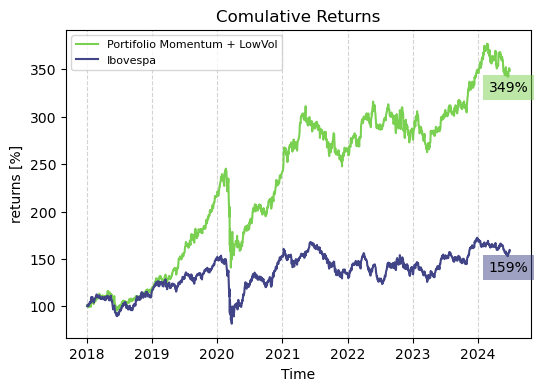

In [311]:
plt.figure(figsize=(6, 4))
plt.plot(t1.index,t1['quota_portifolio']*100, label = 'Portifolio Momentum + LowVol', color='#7AD151FF')
plt.plot(t1.index,t1['ibov_cumm_return']*100, label = 'Ibovespa', color='#414487FF')
plt.grid(visible=True, which='major', axis='x', linestyle='--', color='lightgray')

# print the final return
yp_last = round(t1['quota_portifolio'].iloc[-1]*100)
yibov_last = round(t1['ibov_cumm_return'].iloc[-1]*100)

plt.annotate(f'{yp_last}%', xy=( t1.index[-1], yp_last), xytext=(-15, -15),textcoords='offset points', color='black',
            bbox=dict(facecolor='#7AD151FF', alpha=0.5, edgecolor='none'))
plt.annotate(f'{yibov_last}%', xy=( t1.index[-1], yibov_last), xytext=(-15,-15),textcoords='offset points', color='black',
            bbox=dict(facecolor='#414487FF', alpha=0.5, edgecolor='none'))

#writing title and labels names
plt.title('Comulative Returns')
plt.xlabel('Time')
plt.ylabel('returns [%]')
plt.legend(prop={'size': 8}) 

#### Comparing volatility

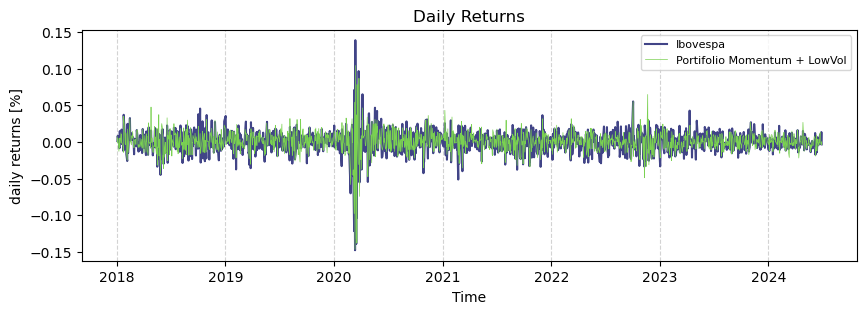

In [322]:
plt.figure(figsize=(10, 3))

plt.plot(t1.index,t1['ibov_returns'], label = 'Ibovespa', color='#414487FF')
plt.plot(t1.index,t1['return_long'], label = 'Portifolio Momentum + LowVol', color='#7AD151FF',linestyle='-',linewidth=0.5)
plt.grid(visible=True, which='major', axis='x', linestyle='--', color='lightgray')

#writing title and labels names
plt.title('Daily Returns')
plt.xlabel('Time')
plt.ylabel('daily returns [%]')
plt.legend(prop={'size': 8}) 

[%] total anualized volatility in the period (2017-2024): 
Portifólio: 23.20%
Ibovespa: 25.00%


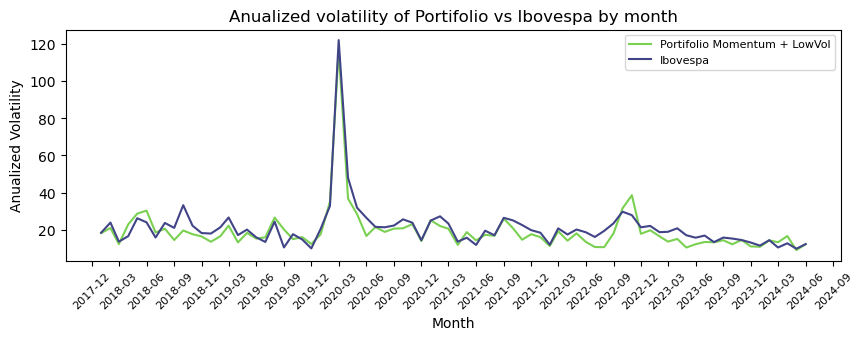

In [349]:
# Calculating anualized volatility per month
t2 = t1.groupby('Yearmon')[['return_long','ibov_returns']].std().rename(columns = {'return_long':'vol_portifolio','ibov_returns':'vol_ibovespa'}) * np.sqrt(252) *100
t2 = t2.reset_index()
t2['Yearmon'] = t2['Yearmon'].dt.to_timestamp()
t2.sort_values(by = ['Yearmon'], inplace = True)

####
# print total volatility
print('[%] total anualized volatility in the period (2017-2024): \nPortifólio: {:.2%}\nIbovespa: {:.2%}'.format(round(t1['return_long'].std()*252**0.5,3),
                                                                round(t1['ibov_returns'].std()*252**0.5,3)))

#### ploting anualized volotatility per month
import matplotlib.dates as mdates

plt.figure(figsize=(10, 3))

plt.plot(t2['Yearmon'],t2['vol_portifolio'], label = 'Portifolio Momentum + LowVol', color='#7AD151FF')
plt.plot(t2['Yearmon'],t2['vol_ibovespa'], label = 'Ibovespa', color='#414487FF')


# ajusting x-ticks 
locator = mdates.MonthLocator(bymonth=[3, 6, 9, 12]) 
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().tick_params(axis='x', rotation=45, labelsize=8)

plt.title('Anualized volatility of Portifolio vs Ibovespa by month')
plt.xlabel('Month')
plt.ylabel('Anualized Volatility')
plt.legend(prop={'size': 8}) 

plt.show()


<a id="7"></a>
## Results and future improvements
[←](#0)

In terms of total returns, the strategy of the portfolio proposed with momentum and low volatility had a better performance than the Ibovespa, with more than twice the accumulated return. This is a very interesting result, especially considering that this return was not achieved through a high volatility rate compared to the benchmark (actually, the portfolio shows less volatility).

**Further improvements:**

There are some issues with this strategy that can be addressed in the future, such as:

**Survivorship bias:** Since we backtested only over the IBrX100 tickers as of July 2024, many tickers that were previously in the index are no longer present for various reasons, such as company bankruptcy, corporate mergers, or companies exiting the exchange. To address this bias, it is possible to use the historical composition of the IBrX100 and, for each month, include the tickers that were actually in the index at each time frame.

**Anomalous Returns** Another shortcoming of the strategy is that companies with incredible performance during this period tend to skew the return results, such as MGLU3. To avoid this issue, we can apply a filter at the beginning to include only tickers under a certain realistic amount of return.


In [103]:
#export resulst to excel for analysis
'''
with pd.ExcelWriter('step_by_step_results_top10_ret_and_low_vol.xlsx', engine='xlsxwriter') as writer:
    df1.to_excel(writer, sheet_name='1_top_10_ret', index = True)
    df2.to_excel(writer, sheet_name='2_top_10_ret_prices', index = True)
    df3.to_excel(writer, sheet_name='3_quota', index = True)
    df4.to_excel(writer, sheet_name='4_quota_long', index = True)
    df5.to_excel(writer, sheet_name='5_quota_portifolio', index = True)
'''